In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


caminhos do diretorio e a contagem das imagens que vamos usar para fazer o treinamento do modelo


In [24]:

dataset_dir = os.path.join(os.getcwd(), 'cat_and_dogs')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)

Train Cats: 5324
Train Dogs: 4906
Validation Cats: 7176
Validation Dogs: 7594


variaveis de modelos e pre-processamento das imagens para treinamento, tamanaho, altura, largura e coloração.

In [25]:
width = 100  # width: largura da imagem que será utilizada pelo modelo (em pixels)
height = 100  # height: altura da imagem que será utilizada pelo modelo (em pixels)
color = 3 # color: número de canais de cor da imagem (3 para RGB)
color_size = 255 # valor máximo para cada canal de cor (255 para imagens de 8 bits)
size_image = (width, height) # tupla que define as dimensões da imagem (largura, altura) para o modelo
format_image = size_image + (color,) # tupla que define as dimensões da imagem incluindo o número de canais de cor (largura, altura, canais)
batch_size = 32 # número de imagens processadas em cada iteração durante o treinamento do model
epochs = 10 # vezes que o treinamento ira percorrer o dataset das imagens
learning_rate = 0.0001 # aprendizagem do modelo
string_values = ['gato', 'cachorro'] # melhorando a visualização do que é cada valor, onde 0 e gato e 1 e cachorro


Este código configura o ambiente para treinar um modelo de classificação de imagens de gatos e cachorros, Ele define os diretórios dos dados, conta a quantidade de imagens para treino e validação.

In [26]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_train_dir,
  batch_size=batch_size,
  image_size=size_image,
  shuffle=True,
)

Found 10230 files belonging to 2 classes.


dataset_validation configura o ambiente para validar o modelo de treinamento de imagens de gatos e cachorros, conta a quantidade de imagens para validação do treinamento do modelo acima.

In [27]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_validation_dir,
  batch_size=batch_size,
  image_size=(width, height),
  shuffle=True,
)

Found 14770 files belonging to 2 classes.


In [28]:
dataset_validation_size = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_size // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('validacao: %d' % tf.data.experimental.cardinality(dataset_validation))
print('teste: %d' % tf.data.experimental.cardinality(dataset_test))

validacao: 370
teste: 92


In [29]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_validation.prefetch(buffer_size = autotune)

In [30]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(string_values[labels[i]])

visualização de algumas imagens do dataset_train, que sera usado para treinar o modelo de rede neural.

<Figure size 640x480 with 0 Axes>

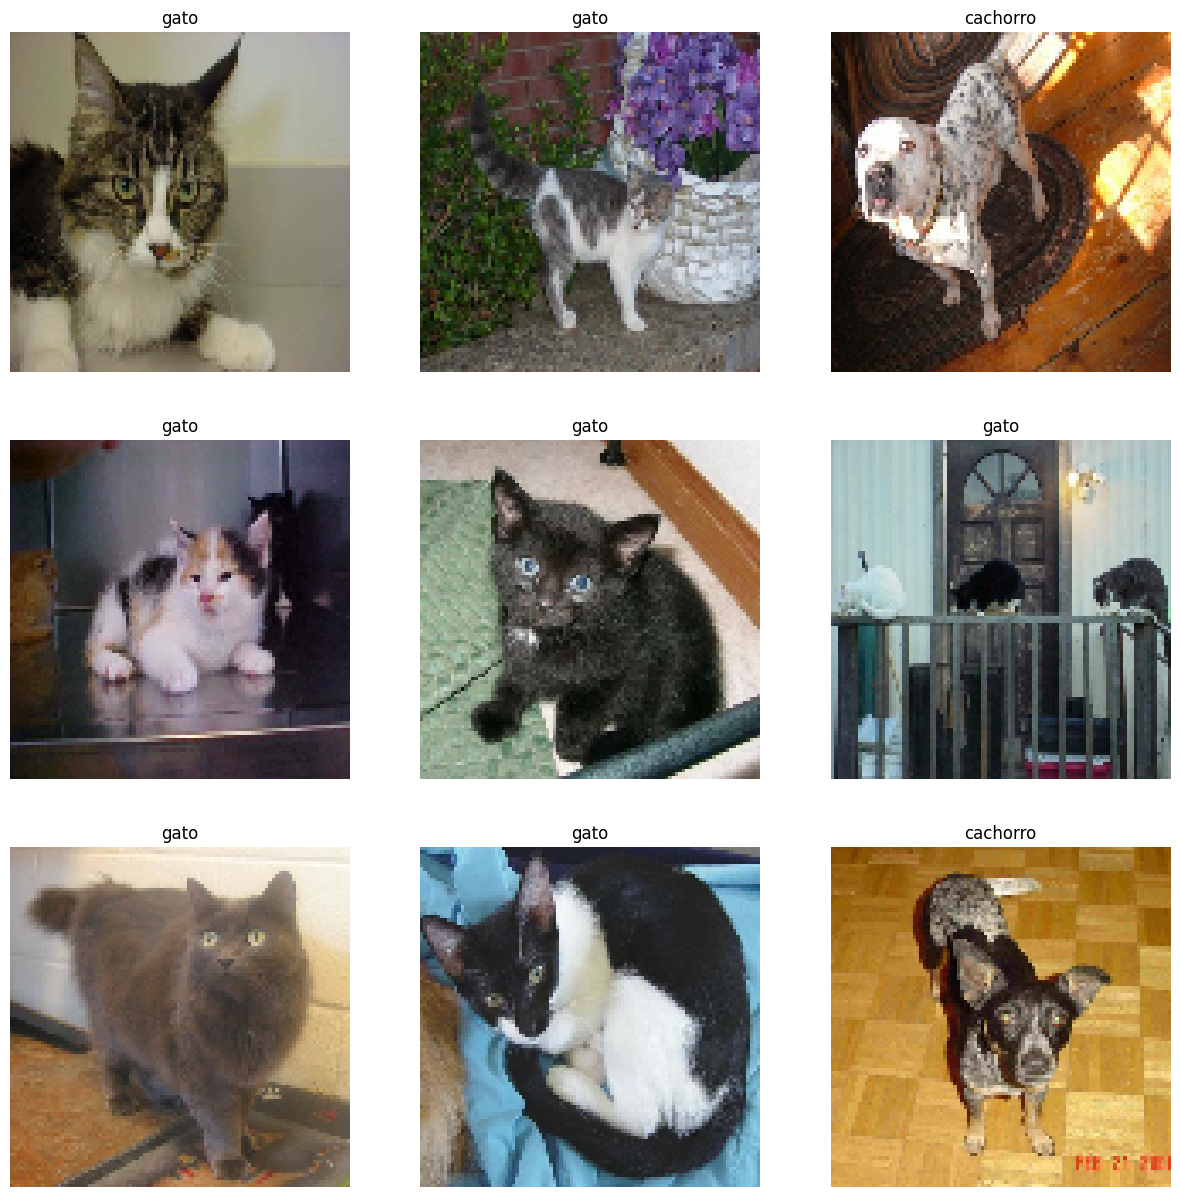

In [31]:
plot_dataset(dataset_train)

visualização de algumas imagens do dataset_validation, que sera usado para validar o dataset_train durante sua execução.

<Figure size 640x480 with 0 Axes>

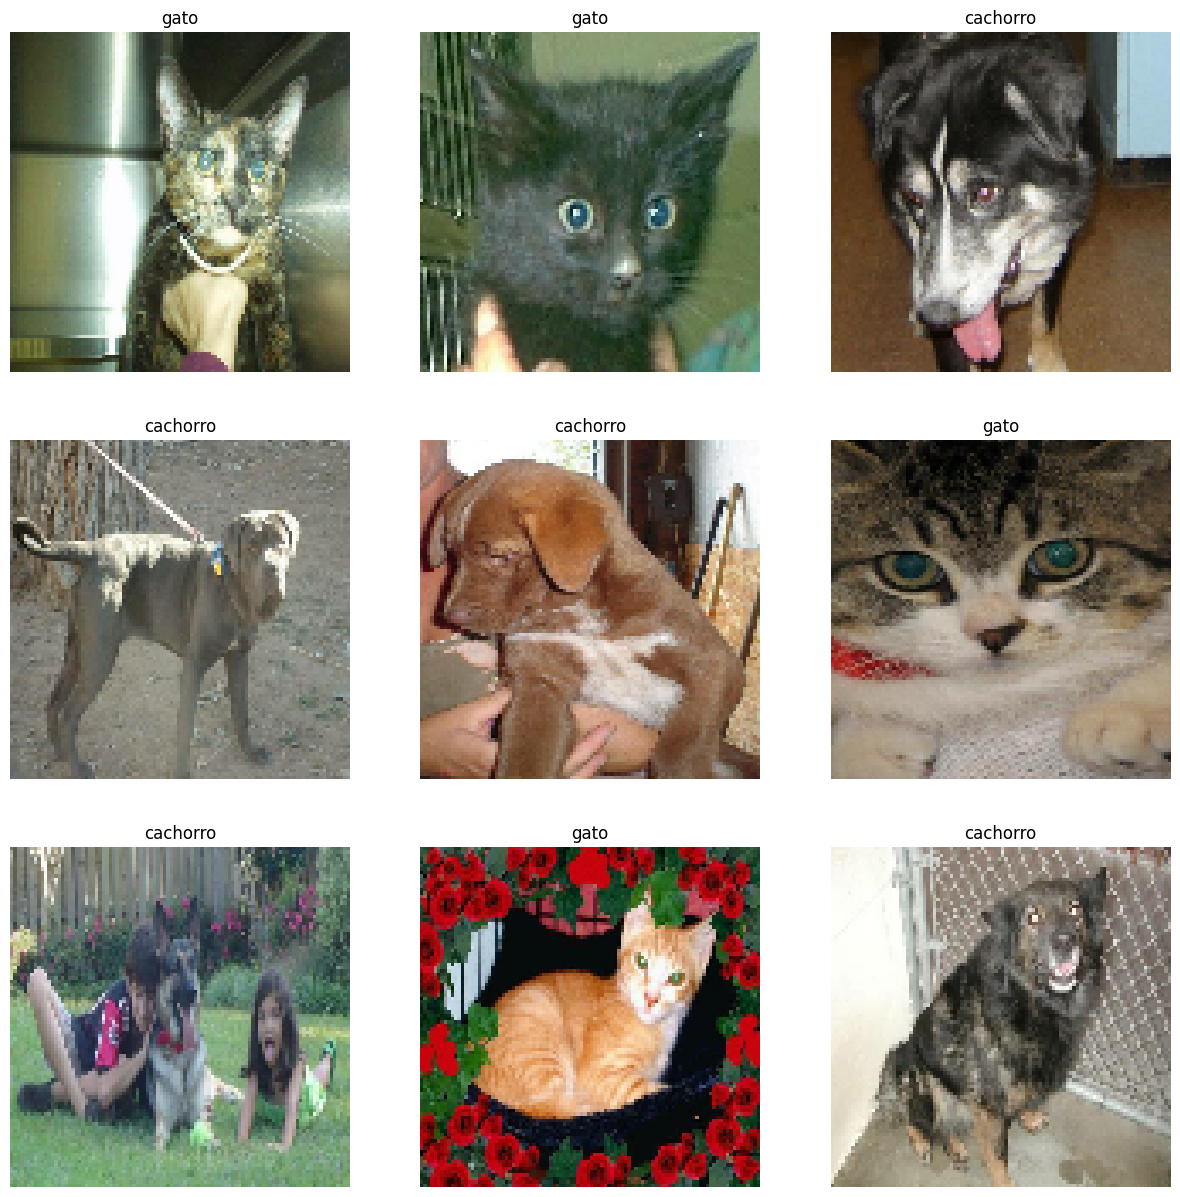

In [32]:
plot_dataset(dataset_validation)

visualização de algumas imagens do dataset_test, que sera usado para testar a accuracy e loss do dataset_train

<Figure size 640x480 with 0 Axes>

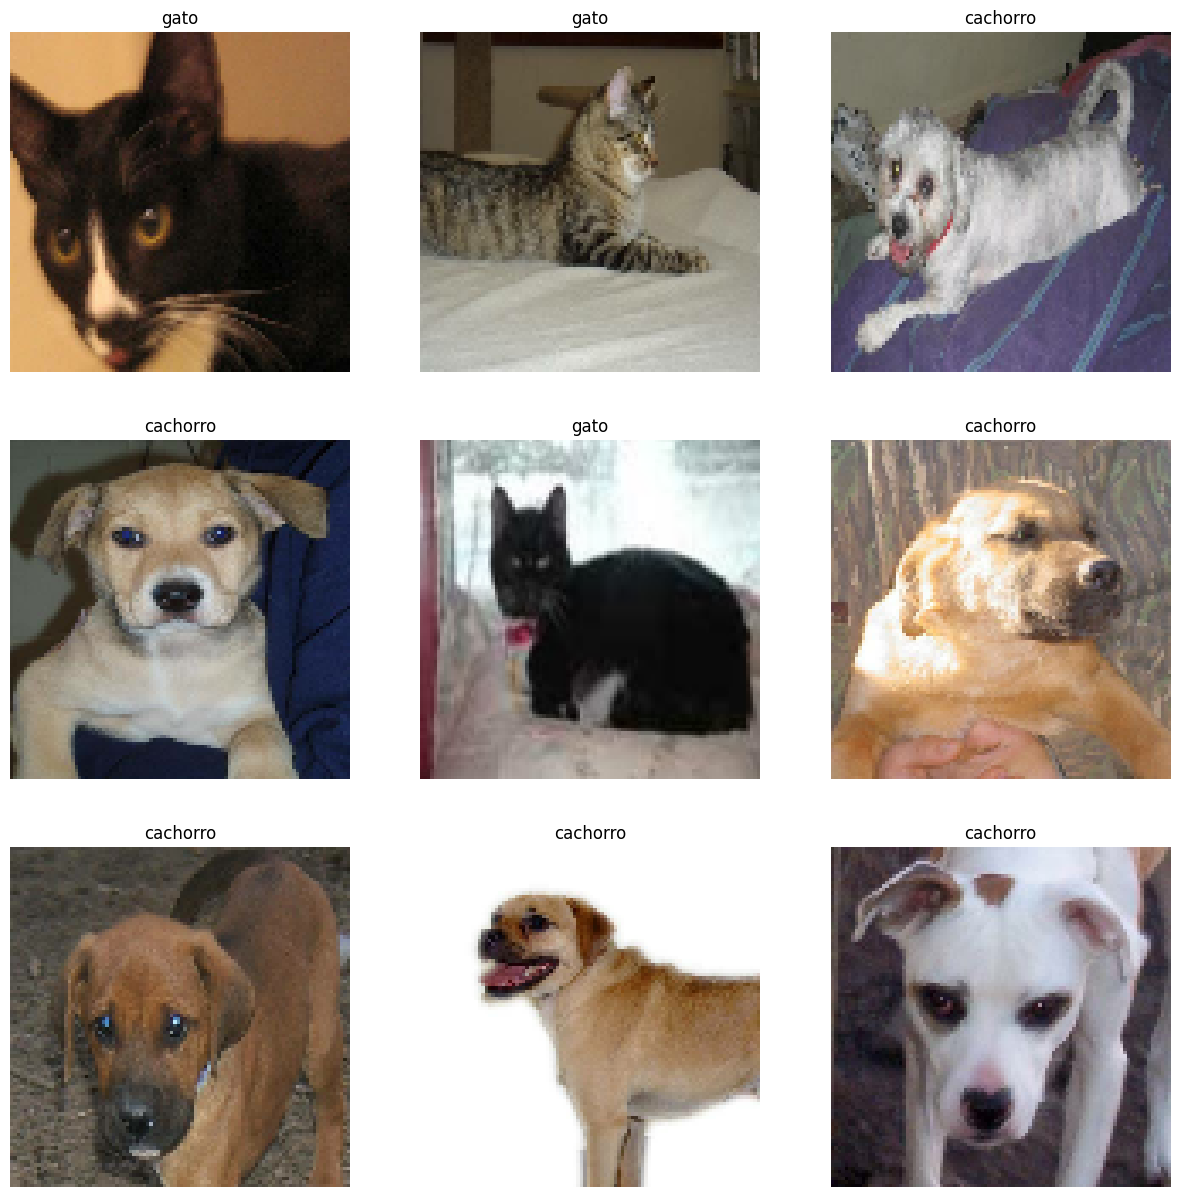

In [33]:
plot_dataset(dataset_test)

tratamento de imagens para o modelos ter maior precisao sobre o seu trainamento, indentificando oque e gato e cachorro. 
aqui foi adicionado rotação, zoom e metodo da imagem, no caso "horizontal" 

In [64]:
tratament_image = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

função para visualizar o tratamento das imagens

In [65]:
def tratament_image_augmentation(dataset):

  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for news, _ in dataset.take(1):

      new = news[0]

      for i in range(9):

        new_tratament_augmentation = tratament_image(tf.expand_dims(new, 0))

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(new_tratament_augmentation[0] / color_size)

visualizando o resultado do tratamento da imagem

<Figure size 640x480 with 0 Axes>

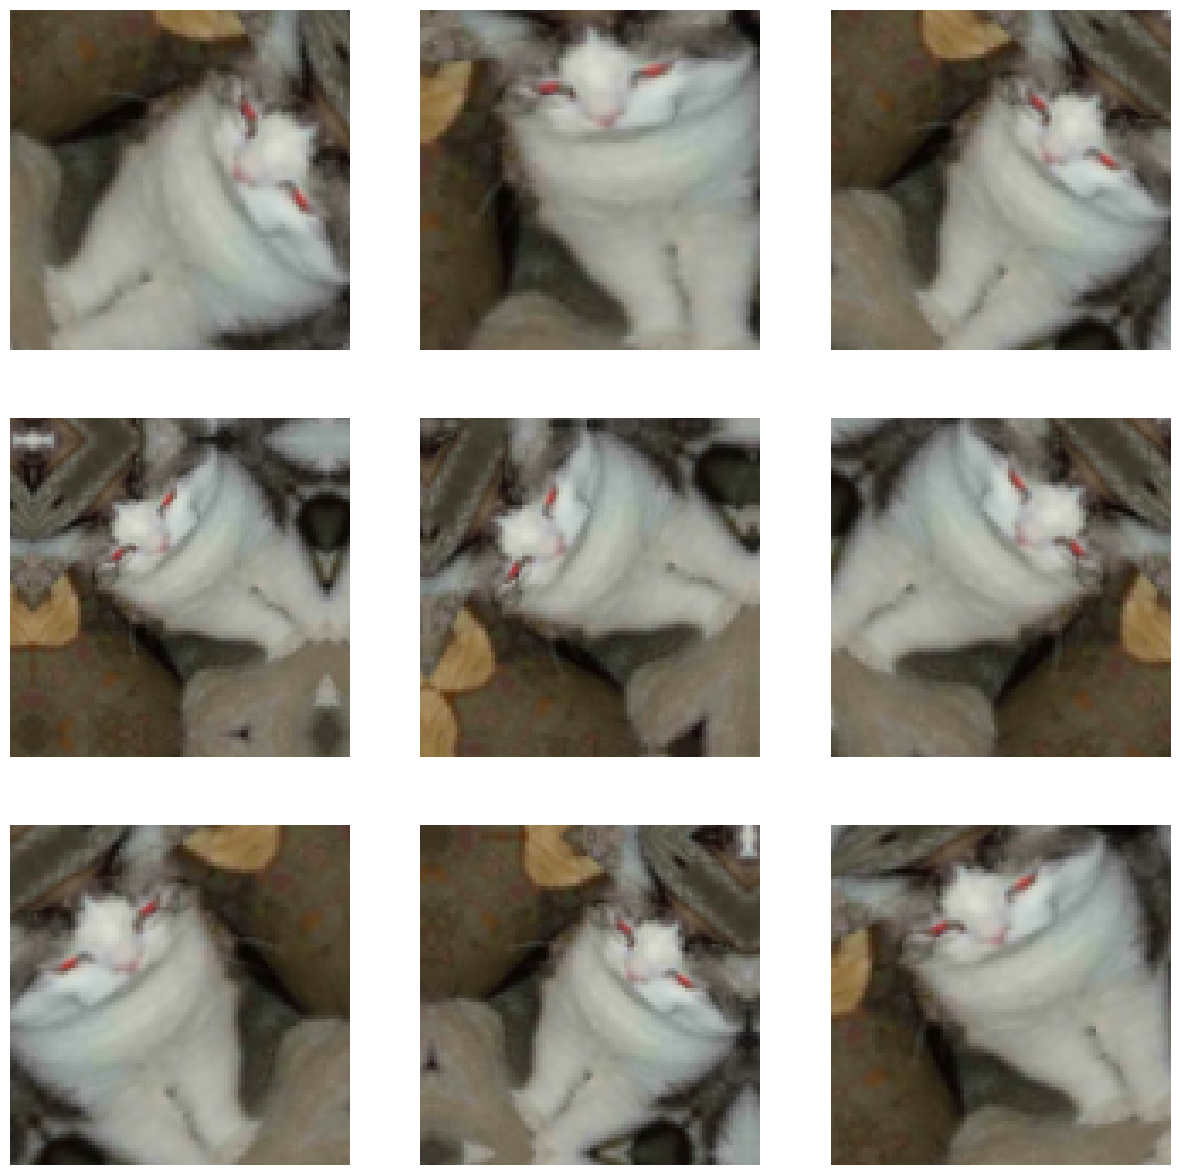

In [66]:
tratament_image_augmentation(dataset_train)

selecionando o modelo para uso no dataset 

opção false para que o modelo nao seja alterado e sendo usado como ja veio por padrao, sem alterações.  

summary para resumo do modelo

In [63]:
model_transfer_learning = tf.keras.applications.MobileNetV2(
  include_top = False,
  weights = 'imagenet',
  input_shape = format_image
)

model_transfer_learning.trainable = False

model_transfer_learning.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 50, 50, 32)           864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 50, 50, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 50, 50, 32)           0         ['bn_Conv1[

modelo de rede neural sequencial:

Rescaling: Rescala as imagens de entrada. 

Tratamento de Imagem: Aplica um tratamento as imagens.  

Transferência de Aprendizado: Utiliza um modelo pre-treinado para extrair características.  

Pooling: Aplica uma operação de pooling as caracteristicas. 

Dropout: Aplica uma taxa de 20% às caracteristicas extraidas pela camada pooling

Densa: Produz uma saida binaria com uma função de ativacao sigmoidal.

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / (color_size / 2),
        offset = -1,
        input_shape = format_image
    ),
    tratament_image,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                

treinamento do modelo passando os parametros de cofiguração
dataset_train,
epochs
e dataset_validation

In [69]:
history = model.fit(
    dataset_train,
    epochs = epochs,
    validation_data = dataset_validation
)

Epoch 1/10


320/320 [==============================] - 160s 492ms/step - loss: 0.6943 - accuracy: 0.6756 - val_loss: 0.3113 - val_accuracy: 0.8655
Epoch 2/10
320/320 [==============================] - 150s 470ms/step - loss: 0.4543 - accuracy: 0.7935 - val_loss: 0.2519 - val_accuracy: 0.8911
Epoch 3/10
320/320 [==============================] - 151s 472ms/step - loss: 0.4112 - accuracy: 0.8173 - val_loss: 0.2271 - val_accuracy: 0.9014
Epoch 4/10
320/320 [==============================] - 164s 513ms/step - loss: 0.3886 - accuracy: 0.8294 - val_loss: 0.2123 - val_accuracy: 0.9088
Epoch 5/10
320/320 [==============================] - 153s 478ms/step - loss: 0.3713 - accuracy: 0.8367 - val_loss: 0.2031 - val_accuracy: 0.9127
Epoch 6/10
320/320 [==============================] - 152s 474ms/step - loss: 0.3579 - accuracy: 0.8453 - val_loss: 0.1965 - val_accuracy: 0.9148
Epoch 7/10
320/320 [==============================] - 151s 472ms/step - loss: 0.3373 - accuracy: 0.8487 - val_loss: 0.1927 - val_accura

função para mapear compartameno do dataset que ele nao foi treinado.

In [76]:
def graph_dataset_analysis(dataset):

  news, labels = dataset.as_numpy_iterator().next()

  views = model.predict_on_batch(news).flatten()
  views = tf.where(views < 0.5, 0, 1)

  print('Real: ', labels)
  print('Pred: ', views.numpy())
  print('\n')
  
  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  for i in range(9):

      plt.subplot(3, 3, i + 1)
      plt.axis('off')

      plt.imshow(news[i].astype('uint8'))
      plt.title(string_values[views[i]])
      plt.title(string_values[labels[i]]) 

resultado da analise do treinamento usando o dataset_test

Real:  [0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1]
Pred:  [1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1]




<Figure size 640x480 with 0 Axes>

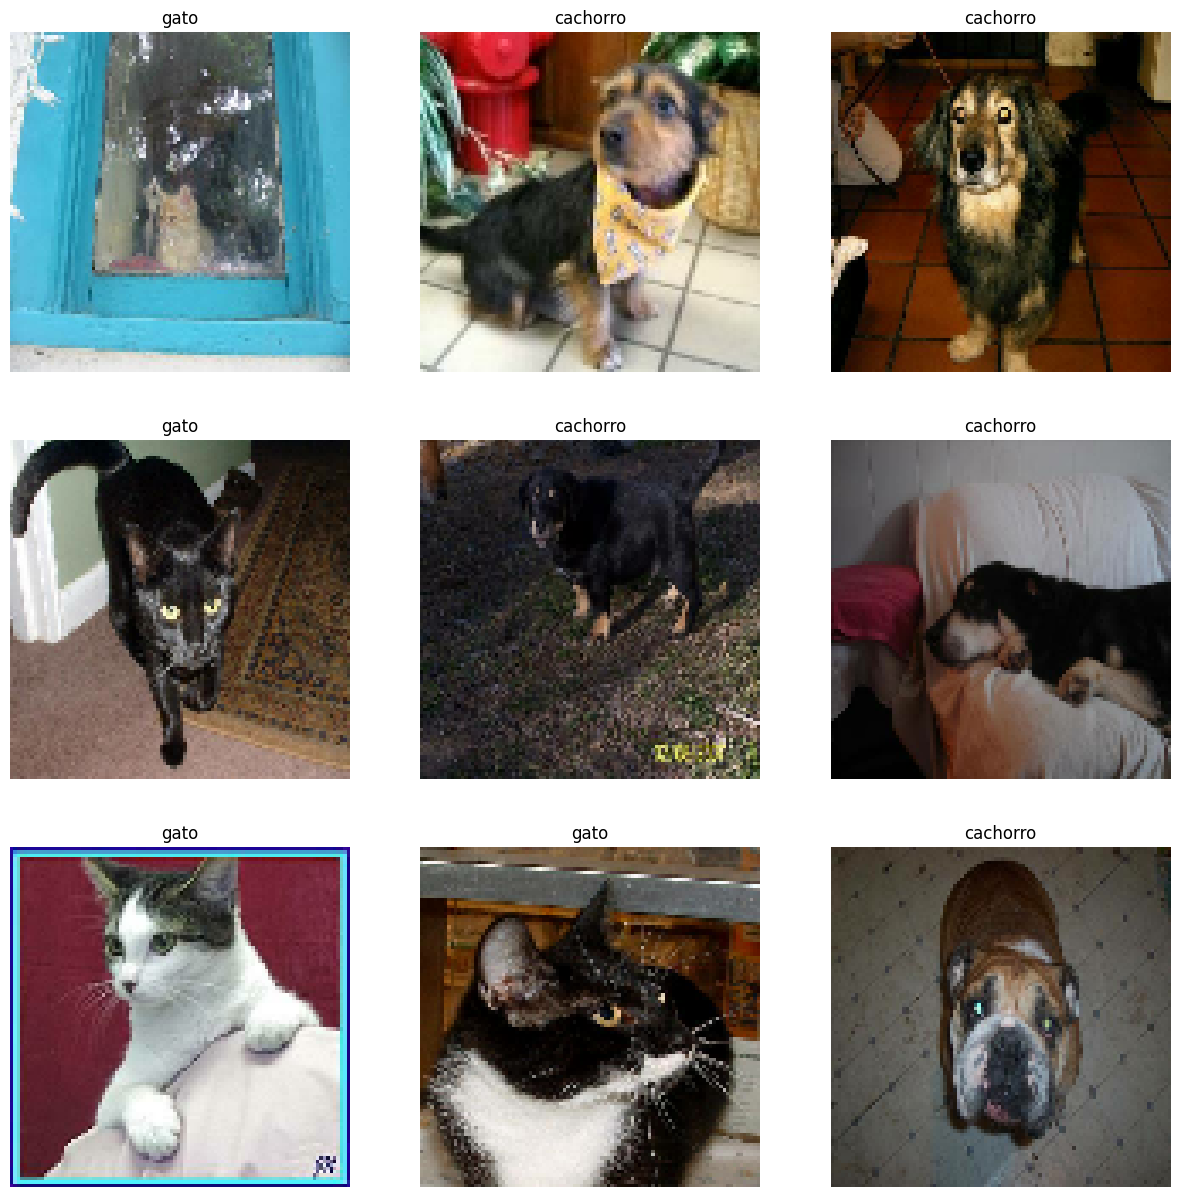

In [77]:
graph_dataset_analysis(dataset_test)

salvando modelo

In [74]:
model.save('path/to/model_melhorado')

INFO:tensorflow:Assets written to: path/to/model_melhorado\assets


INFO:tensorflow:Assets written to: path/to/model_melhorado\assets


carregado modelo

In [ ]:
model = tf.keras.models.load_model('path/to/model_melhorado')

mas e agora??, como saber a performance desse modelo? como saber o comportamento se esta bom ou ruim e quais parametros podemos melhorar?

montaremos uma funçao que monitora o desempenho de accuracy e validation

In [72]:
def behavior_model():

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  range_epochs = range(epochs)

  plt.gcf().clear()
  plt.figure(figsize = (15, 15))

  plt.subplot(1, 2, 1)
  plt.title('comportamento de accuracy e validation')
  plt.plot(range_epochs, accuracy, label = 'train_accuracy')
  plt.plot(range_epochs, val_accuracy, label = 'val_accuracy')
  plt.legend(loc='lower right')

  plt.subplot(1, 2, 2)
  plt.title('comportamento de loss e validation')
  plt.plot(range_epochs, loss, label = 'train_loss')
  plt.plot(range_epochs, val_loss, label = 'val_loss')
  plt.legend(loc='lower right')

  plt.show()

execução da função bahavior_model

ao visualizarmos a analise do modelo_melhorado, notamos que houve uma grande melhoria de accuracy e loss validation, o comportamento de ambos melhoraram alterando paramteros e modelo especificados no arquivo csv, onde conta os detalhes.

<Figure size 640x480 with 0 Axes>

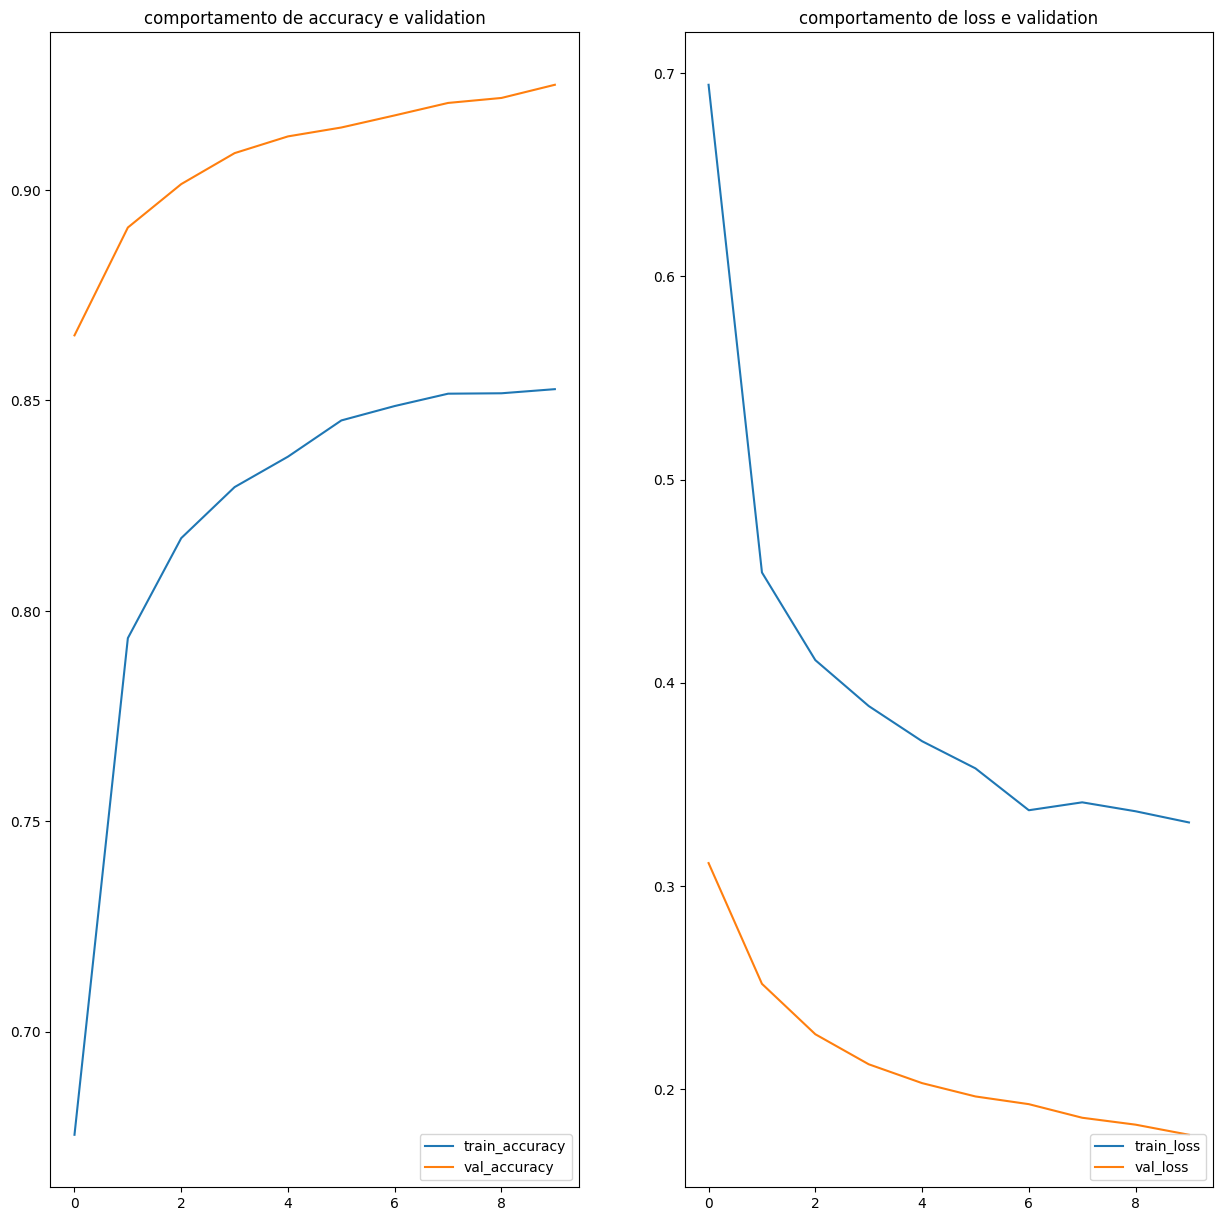

In [73]:
behavior_model()